# Predicting Housing Prices with regularized regression

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [77]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [40]:
# Data preparation
data = pd.read_csv('data/House_price.csv')
data.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [41]:
data.isna().sum()

Avg. Area Income      0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
dtype: int64

In [43]:
x = data.iloc[:,0:5]
x

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4543,84556.63627,5.092459,6.723412,2.42,31797.31744
4544,82732.98111,5.332712,6.198476,3.49,41136.52722
4545,65694.05127,6.436741,6.704929,3.14,43406.71203
4546,76061.35071,7.148713,7.546066,6.30,40876.96459


In [45]:

y=data.iloc[:,-2:-1]
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4543,1.326847e+06
4544,1.252664e+06
4545,1.359763e+06
4546,1.778013e+06


In [46]:
#spliting the dataset into train & test sets

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)


In [47]:
ytest.shape

(910, 1)

In [48]:
print('<--------- Base Regression --------------> \n')
from sklearn.linear_model import LinearRegression
base_reg = LinearRegression()
base_reg.fit(xtrain,ytrain)
base_pred = base_reg.predict(xtest)

#PERFORMANCE METRIC

from sklearn.metrics import r2_score
print("base Train score \t",base_reg.score(xtrain,ytrain))
print()
print("base Test score \t",base_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,base_pred))
print()
print('MAE \t',mean_absolute_error(ytest,base_pred))
print('MSE \t',mean_squared_error(ytest,base_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,base_pred)))

<--------- Base Regression --------------> 

base Train score 	 0.9197738489341133

base Test score 	 0.9142829141607485

R-Square 	 0.9142829141607485

MAE 	 81900.35937202121
MSE 	 10228988039.408834
RMSE 	 101138.4597440995


In [57]:
# Implement the Lasso regression Model
print('<------------ Lasso Regression model ----------->\n')
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(xtrain,ytrain)
lasso_pred = lasso_reg.predict(xtest)

print("Lasso Train score \t",lasso_reg.score(xtrain,ytrain))
print()
print("Lasso Test score \t",lasso_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,lasso_pred))

<------------ Lasso Regression model ----------->

Lasso Train score 	 0.9197738489339476

Lasso Test score 	 0.9142829139914695

R-Square 	 0.9142829139914695


In [58]:
# Evaluate the Lasso regression Model
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error
print('MAE \t',mean_absolute_error(ytest,lasso_pred))
print('MSE \t',mean_squared_error(ytest,lasso_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,lasso_pred)))

MAE 	 81900.35745321751
MSE 	 10228988059.609615
RMSE 	 101138.45984396646


In [59]:
# Implement the Ridge regression Model
print('<------------ Ridge Regression model ----------->\n')
ridge_reg = Ridge(alpha = 0.01)
ridge_reg.fit(xtrain,ytrain)
ridge_pred = ridge_reg.predict(xtest)

print("Lasso Train score:\t",ridge_reg.score(xtrain,ytrain))
print()
print("Lasso Test score:\t",ridge_reg.score(xtest,ytest))
print()
print("R-Square:\t",r2_score(ytest,ridge_pred))

<------------ Ridge Regression model ----------->

Lasso Train score:	 0.9197738489314025

Lasso Test score:	 0.9142828866250594

R-Square:	 0.9142828866250594


In [60]:
# Evaluate the Ridge regression Model
print('MAE \t',mean_absolute_error(ytest,ridge_pred))
print('MSE \t',mean_squared_error(ytest,ridge_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,ridge_pred)))

MAE 	 81900.3814680321
MSE 	 10228991325.360895
RMSE 	 101138.47598891777


In [61]:
# Model Comparision of Lasso and Ridge regression using performance metric..
print('MAE \t',mean_absolute_error(lasso_pred,ridge_pred))
print('MSE \t',mean_squared_error(lasso_pred,ridge_pred))
print('RMSE \t',np.sqrt(mean_squared_error(lasso_pred,ridge_pred)))

MAE 	 0.3733457761376605
MSE 	 0.22182923697202034
RMSE 	 0.4709875125436133


In [71]:
# Hyperparameter Tuning of Lasso Regression model

print('<------------ Lasso Regression model ----------->\n')
lasso_reg = Lasso(alpha = 0.0001)  #tuning alpha value
lasso_reg.fit(xtrain,ytrain)
lasso_pred = lasso_reg.predict(xtest)

print("R-Square \t",r2_score(ytest,lasso_pred))

<------------ Lasso Regression model ----------->

R-Square 	 0.9142829141605685


In [72]:
# Hyperparameter Tuning of Ridge Regression model

print('<------------ Ridge Regression model ----------->\n')
ridge_reg = Ridge(alpha = 0.0001) #tuning alpha value
ridge_reg.fit(xtrain,ytrain)
ridge_pred = ridge_reg.predict(xtest)

print("R-Square:\t",r2_score(ytest,ridge_pred))

<------------ Ridge Regression model ----------->

R-Square:	 0.9142829138854277


In [73]:
# Model Comparision after Hyperparameter Tuning
print('MAE \t',mean_absolute_error(lasso_pred,ridge_pred))
print('MSE \t',mean_squared_error(lasso_pred,ridge_pred))
print('RMSE \t',np.sqrt(mean_squared_error(lasso_pred,ridge_pred)))

MAE 	 0.004477770066727976
MSE 	 3.2139714303251204e-05
RMSE 	 0.005669189915962527


# 


# 

## Diagnosing and Remedying Heteroscedasticity and Multicollinearity

In [78]:
data = pd.read_csv('data/employee_performance.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [79]:
data.isna().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [80]:
x=data[['Age','Projects Completed','Productivity (%)','Satisfaction Rate (%)','Feedback Score']]
y=data['Salary']

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [82]:
print('<--------- Base Regression --------------> \n')
from sklearn.linear_model import LinearRegression
base_reg = LinearRegression()
base_reg.fit(xtrain,ytrain)
base_pred = base_reg.predict(xtest)

#PERFORMANCE METRIC

from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error,explained_variance_score
print("base Train score \t",base_reg.score(xtrain,ytrain))
print()
print("base Test score \t",base_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,base_pred))
print()
print('MAE \t',mean_absolute_error(ytest,base_pred))
print('MSE \t',mean_squared_error(ytest,base_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,base_pred)))

<--------- Base Regression --------------> 

base Train score 	 0.8388872878091449

base Test score 	 0.8063796938180696

R-Square 	 0.8063796938180696

MAE 	 8953.8979704157
MSE 	 118976861.28845832
RMSE 	 10907.651501971372


In [93]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

residuals = ytest-base_pred
residuals

112     4815.670020
29     -7254.715432
182    -1076.012136
199    23784.345322
193    17329.174568
85    -19825.428583
10      3542.494118
54      6545.275554
115    15632.112257
35      2511.544111
12     -7307.635344
92     -4431.468466
13    -10934.882071
126    -2342.292649
174     1108.094731
2       2434.729392
44     15049.651516
3      -5818.173215
113    -5521.547519
14      1944.423565
23     10525.838267
25    -18371.443421
6      -6060.450861
134   -11748.415505
165    21112.664864
173    13470.830230
45     -4881.573246
65    -13456.203821
48      7831.095311
122   -11210.523237
178     -889.423170
64     17605.027297
9      -5517.825888
57      5165.178030
78    -10017.631498
71      6025.439223
128   -14638.734882
176     -120.557796
131    -5141.263743
53    -15156.127960
Name: Salary, dtype: float64

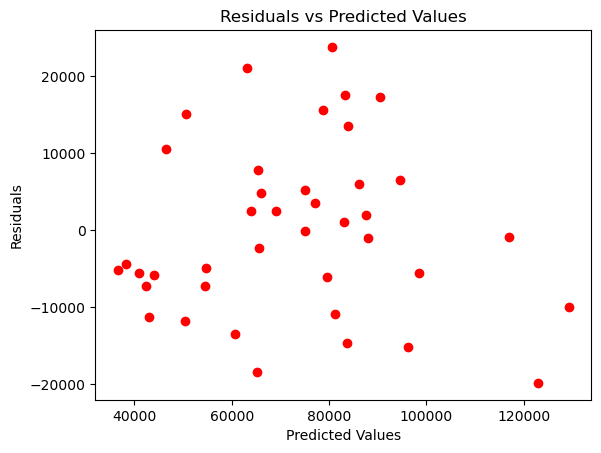

In [84]:
plt.scatter(base_pred,residuals,c='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [85]:
# Remedying Heteroscedasticity using weighted least squares regression
# this formula give more importance to observations with smaller variances
weights = 1 / (residuals.var())
weights

8.196075027839576e-09

In [100]:
wls_model = sm.WLS(y, sm.add_constant(x), weights=weights).fit()

In [89]:
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.835
Model:                            WLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.22e-74
Time:                        10:36:20   Log-Likelihood:                -2144.5
No. Observations:                 200   AIC:                             4301.
Df Residuals:                     194   BIC:                             4321.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.353e+04   4143.929      3.265      0.001    5357.404    2.17e+04
Age                    1114.2473    124.485      8.951      0.000     868.730    1359.765
Projects Completed     2412.3472    191.189     12.618      0.000    2035.272    2789.422
Productivity (%)        -16.2215     27.805     -0.583      0.560     -71.061      38.618
Satisfaction Rate (%)   -23.7348     27.406     -0.866      0.388     -77.787      30.318
Feedback Score         -419.5511    708.048     -0.593      0.554   -1816.012     976.910
==============================================================================
Omnibus:                        7.367   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.607
Skew:                           0.457   Prob(JB):                       0.0223
Kurtosis:                       2.719   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Detecting Multicollinearity Using Correlation Matrices

correlation_matrix = data.corr()
print(correlation_matrix)

                            Age  Projects Completed  Productivity (%)  \
Age                    1.000000            0.758364          0.021193   
Projects Completed     0.758364            1.000000          0.061707   
Productivity (%)       0.021193            0.061707          1.000000   
Satisfaction Rate (%)  0.035284           -0.010815          0.049897   
Feedback Score         0.012014            0.083170         -0.005948   
Salary                 0.834550            0.874329          0.025519   

                       Satisfaction Rate (%)  Feedback Score    Salary  
Age                                 0.035284        0.012014  0.834550  
Projects Completed                 -0.010815        0.083170  0.874329  
Productivity (%)                    0.049897       -0.005948  0.025519  
Satisfaction Rate (%)               1.000000        0.008068 -0.018302  
Feedback Score                      0.008068        1.000000  0.034818  
Salary                             -0.018302      

C:\Users\2001s\AppData\Local\Temp\ipykernel_11936\3055052630.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [105]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.001)
ridge_model.fit(x, y)
y_pred = ridge_model.predict(xtest)

In [108]:
# PERFORMANCE METRIC

print("R-Square \t",r2_score(ytest,y_pred))
print()
print('MAE \t',mean_absolute_error(ytest,y_pred))
print('MSE \t',mean_squared_error(ytest,y_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,y_pred)))

R-Square 	 0.8135484043662291

MAE 	 8837.720172202298
MSE 	 114571792.9496857
RMSE 	 10703.821418058398


In [109]:
print('intercept/constant \t',ridge_model.intercept_)
print('Coefficient/slope \t',ridge_model.coef_)

intercept/constant 	 13530.332455556803
Coefficient/slope 	 [1114.24748738 2412.34660831  -16.22152085  -23.73477038 -419.54919365]
